In [1]:
%pylab inline
import cv2
import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
nb_vertical = 6
nb_horizontal = 9

objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

objpoints_left = [] # 3d point in real world space
imgpoints_left = [] # 2d points in image plane.

def sorter(item):
    """Get an item from the list (one-by-one) and return a score for that item."""
    return item[1]

lefts = glob.glob('Stereo_calibration_images/left*.png')
lefts = sorted(lefts, key=sorter)

for fname in lefts:
    img = cv2.imread(fname)
    h, w = img.shape[:2]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(img, (nb_vertical,nb_horizontal),  None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints_left.append(objp)

        imgpoints_left.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
        #cv2.imshow('img',img)
        #cv2.waitKey(50)

#cv2.destroyAllWindows()
#cv2.waitKey(1)


objpoints_right = [] # 3d point in real world space
imgpoints_right = [] # 2d points in image plane.

rights = glob.glob('Stereo_calibration_images/right*.png')
rights = sorted(rights, key=sorter)


for fname in rights:
    img = cv2.imread(fname)
    h, w = img.shape[:2]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(img, (nb_vertical,nb_horizontal),  None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints_right.append(objp)

        imgpoints_right.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
        #cv2.imshow('img',img)
        #cv2.waitKey(50)

#cv2.destroyAllWindows()
#cv2.waitKey(1)

In [3]:
ret_left, mtx_left, dist_left, rvecs_left, tvecs_left = cv2.calibrateCamera(objpoints_left, imgpoints_left, gray.shape[::-1], None, None)
img_left = cv2.imread('Stereo_calibration_images/left-0000.png')
h_left,  w_left = img_left.shape[:2]
newcameramtx_left, roi_left = cv2.getOptimalNewCameraMatrix(mtx_left,dist_left,(w_left,h_left),1,(w_left,h_left))
print (newcameramtx_left,roi_left)
ret_right, mtx_right, dist_right, rvecs_right, tvecs_right = cv2.calibrateCamera(objpoints_right, imgpoints_right, gray.shape[::-1], None, None)
img_right = cv2.imread('Stereo_calibration_images/right-0000.png')
h_right,  w_right = img_right.shape[:2]
newcameramtx_right, roi_right = cv2.getOptimalNewCameraMatrix(mtx_right,dist_right,(w_right,h_right),1,(w_right,h_right))
print (newcameramtx_right,roi_right)

[[111.67014313   0.         985.37919345]
 [  0.         111.16440582 584.12231888]
 [  0.           0.           1.        ]] (0, 0, 0, 0)
[[3.90126953e+01 0.00000000e+00 1.21232266e+03]
 [0.00000000e+00 4.97471695e+01 6.74978649e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] (0, 0, 0, 0)


Text(0.5, 1.0, 'Undistorted right image')

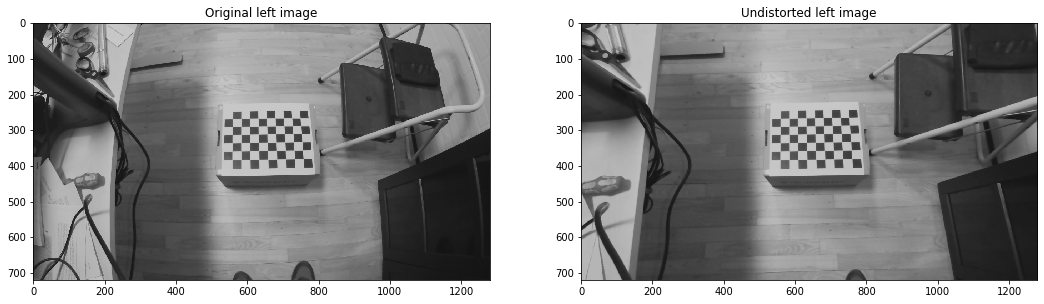

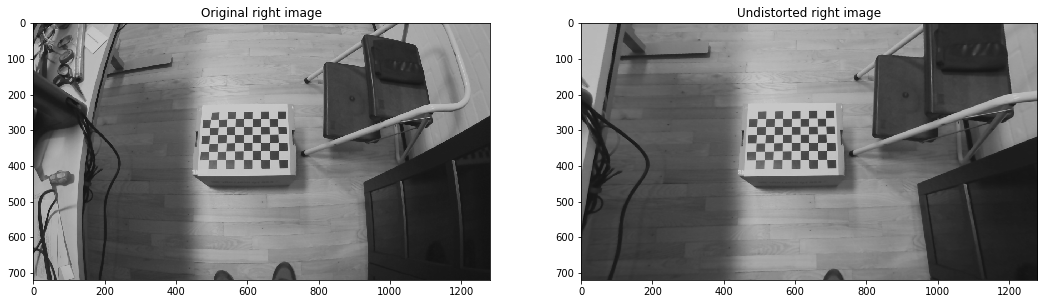

In [5]:
# undistort
dst_left = cv2.undistort(img_left, mtx_left, dist_left, None, None)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img_left[...,[2,1,0]])
ax[0].set_title('Original left image')
ax[1].imshow(dst_left[...,[2,1,0]])
ax[1].set_title('Undistorted left image')

# undistort
dst_right = cv2.undistort(img_right, mtx_right, dist_right, None, None)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img_right[...,[2,1,0]])
ax[0].set_title('Original right image')
ax[1].imshow(dst_right[...,[2,1,0]])
ax[1].set_title('Undistorted right image')

 0
1 a 1
2 b 2
1 2 ab 3
8 c 8
1 8 ac 9
2 8 bc 10
1 2 8 abc 11
16384 d 16384
1 16384 ad 16385
2 16384 bd 16386
1 2 16384 abd 16387
8 16384 cd 16392
1 8 16384 acd 16393
2 8 16384 bcd 16394
1 2 8 16384 abcd 16395
16 e 16
1 16 ae 17
2 16 be 18
1 2 16 abe 19
8 16 ce 24
1 8 16 ace 25
2 8 16 bce 26
1 2 8 16 abce 27
16384 16 de 16400
1 16384 16 ade 16401
2 16384 16 bde 16402
1 2 16384 16 abde 16403
8 16384 16 cde 16408
1 8 16384 16 acde 16409
2 8 16384 16 bcde 16410
1 2 8 16384 16 abcde 16411
512 f 512
1 512 af 513
2 512 bf 514
1 2 512 abf 515
8 512 cf 520
1 8 512 acf 521
2 8 512 bcf 522
1 2 8 512 abcf 523
16384 512 df 16896
1 16384 512 adf 16897
2 16384 512 bdf 16898
1 2 16384 512 abdf 16899
8 16384 512 cdf 16904
1 8 16384 512 acdf 16905
2 8 16384 512 bcdf 16906
1 2 8 16384 512 abcdf 16907
16 512 ef 528
1 16 512 aef 529
2 16 512 bef 530
1 2 16 512 abef 531
8 16 512 cef 536
1 8 16 512 acef 537
2 8 16 512 bcef 538
1 2 8 16 512 abcef 539
16384 16 512 def 16912
1 16384 16 512 adef 16913
2 16384 1

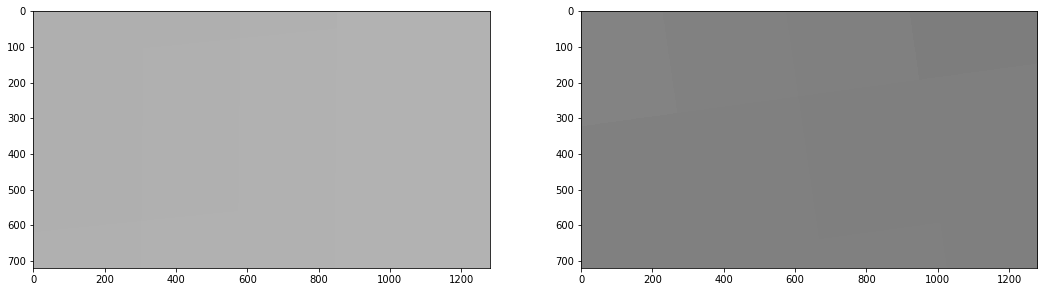

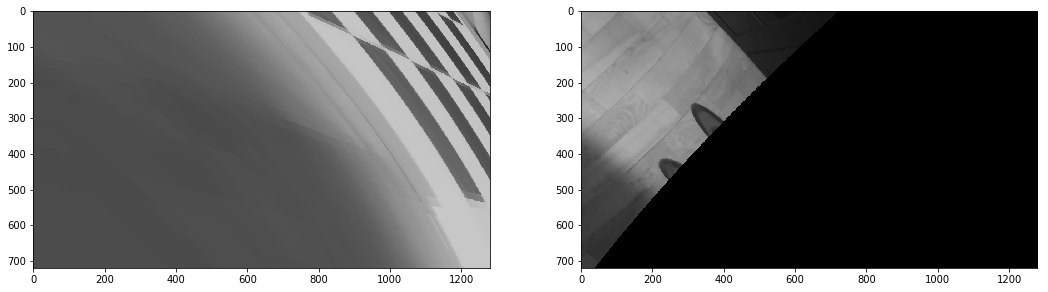

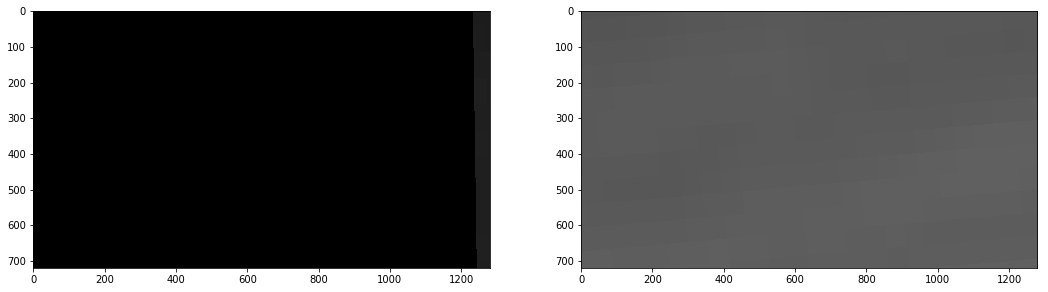

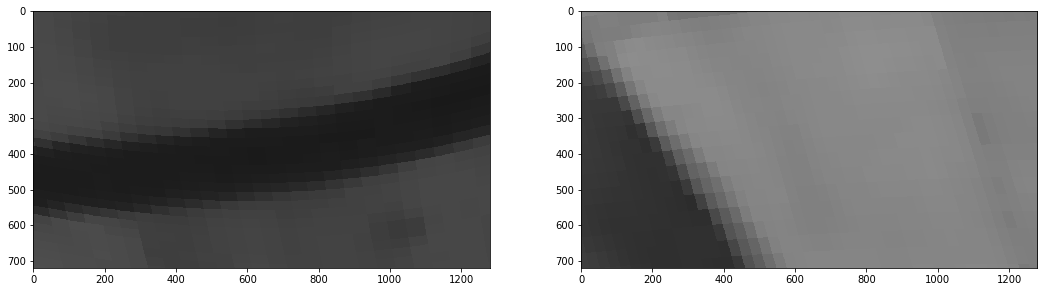

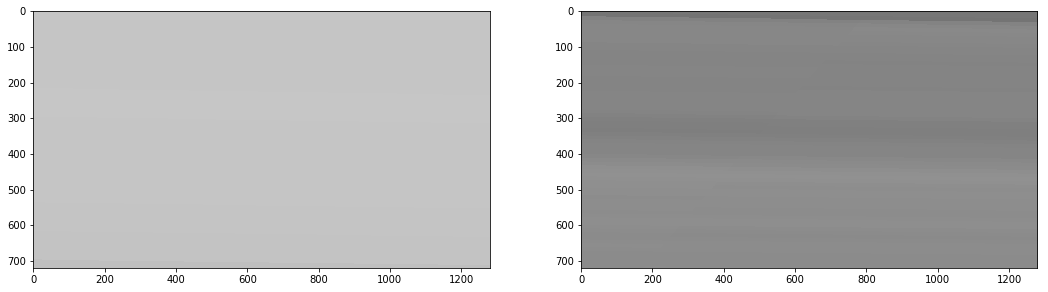

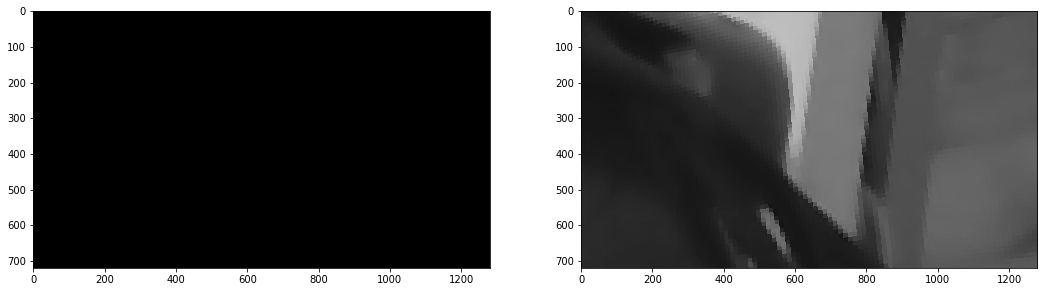

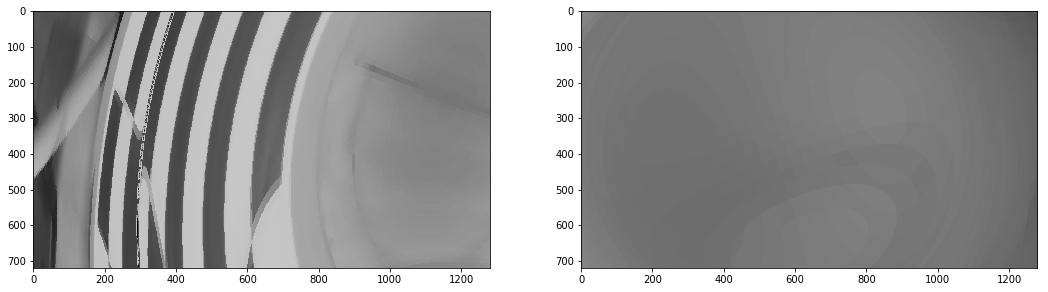

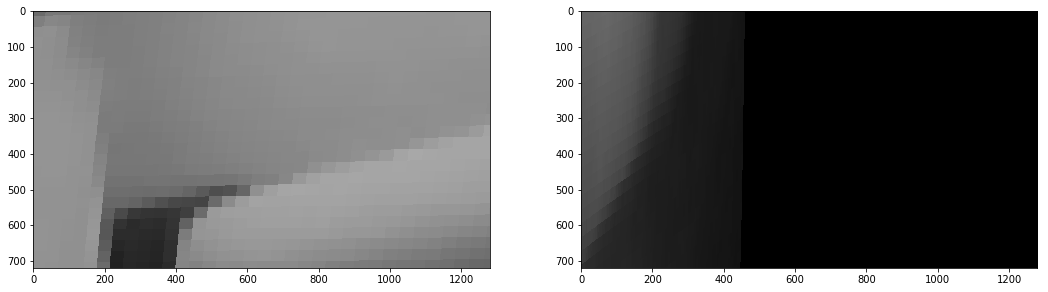

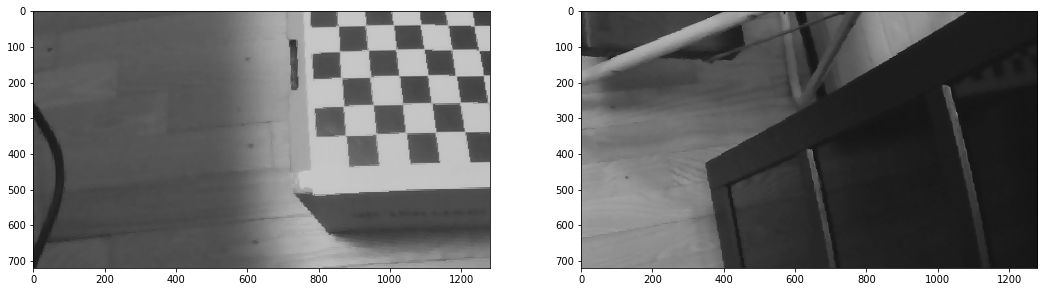

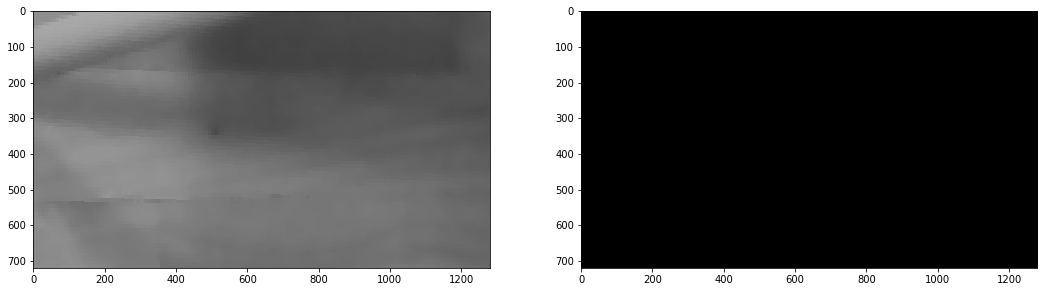

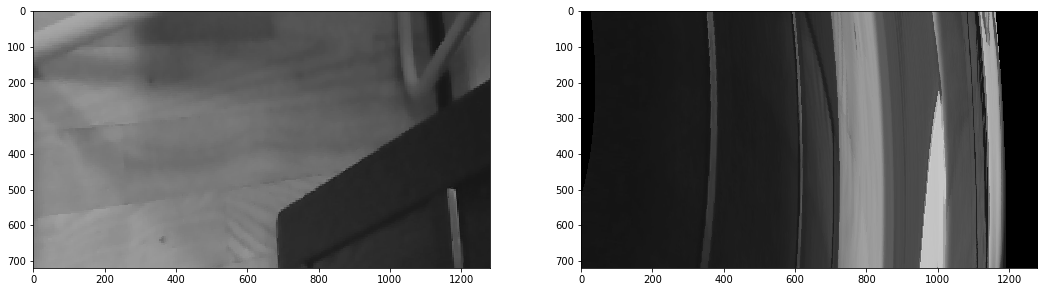

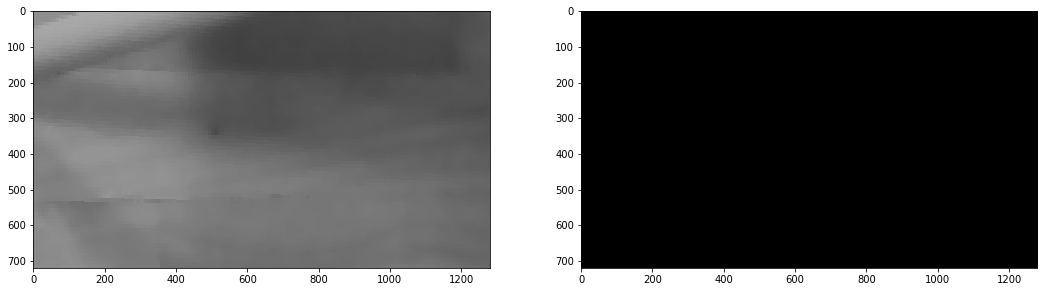

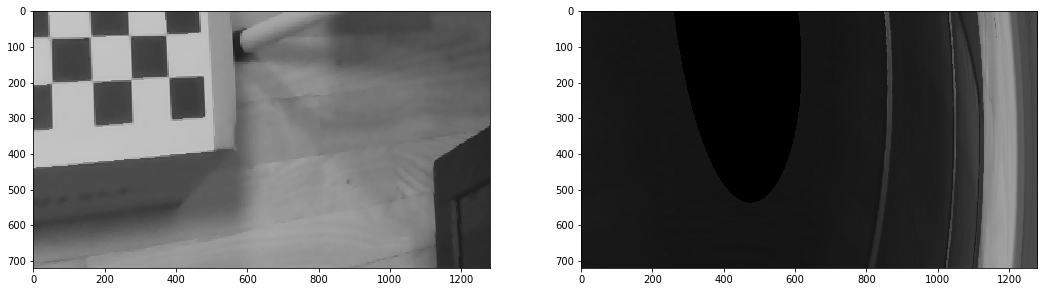

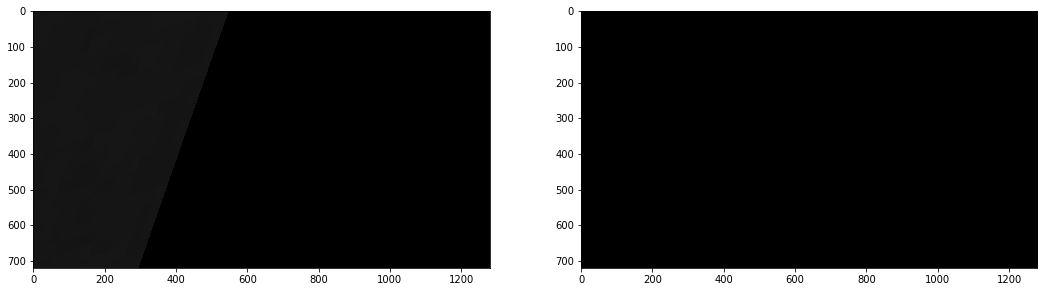

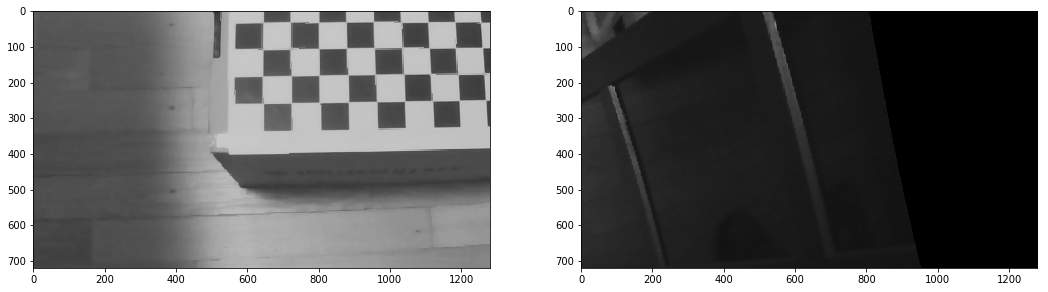

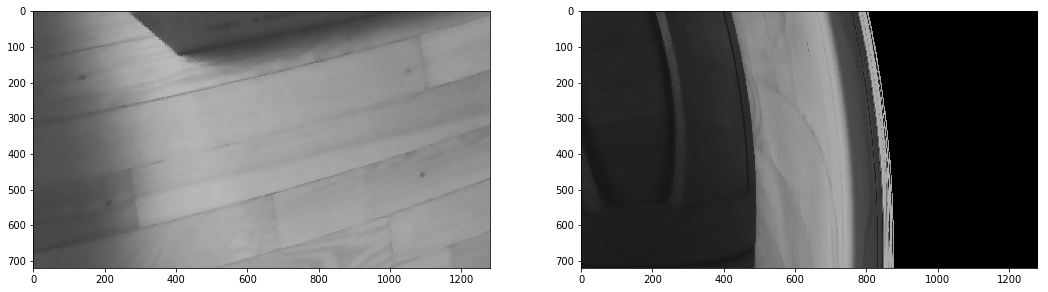

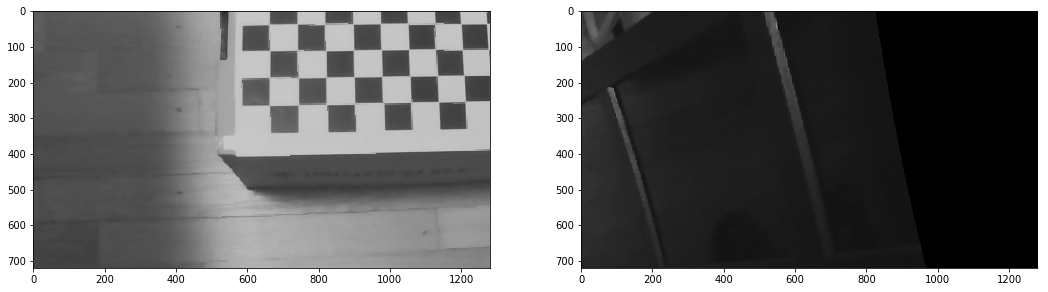

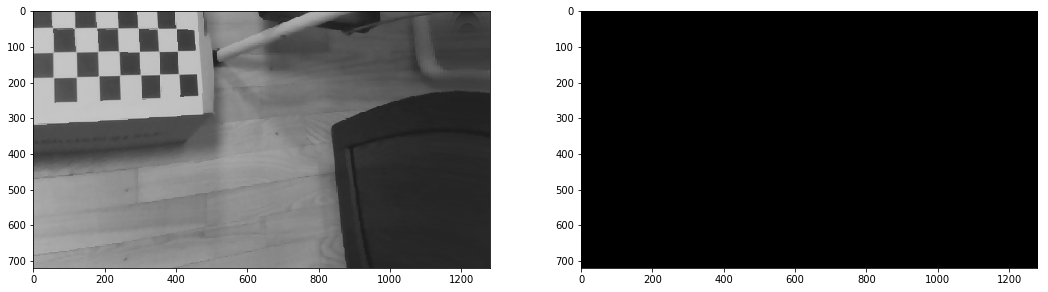

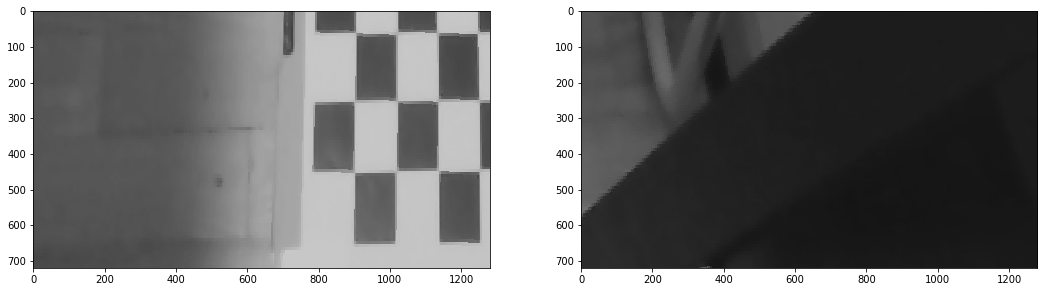

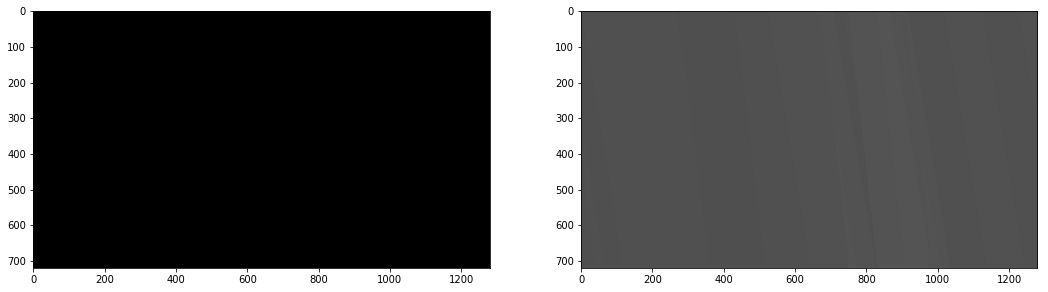

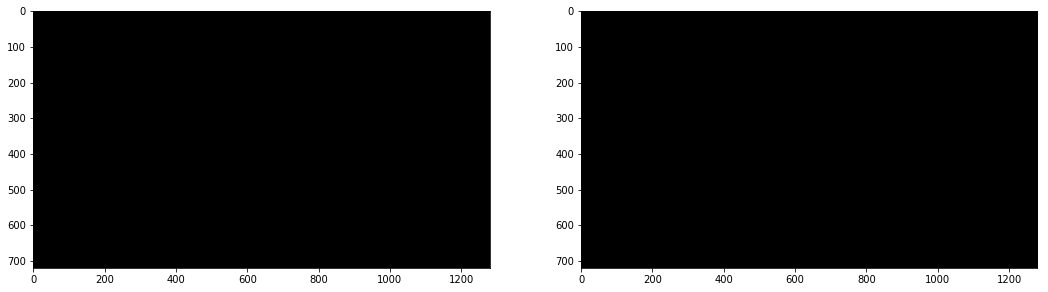

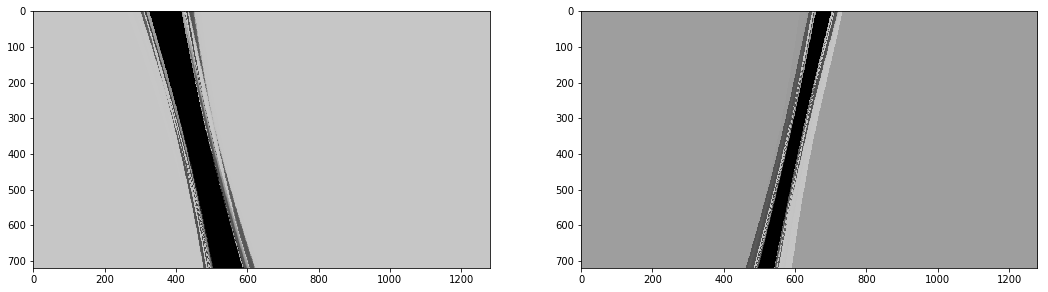

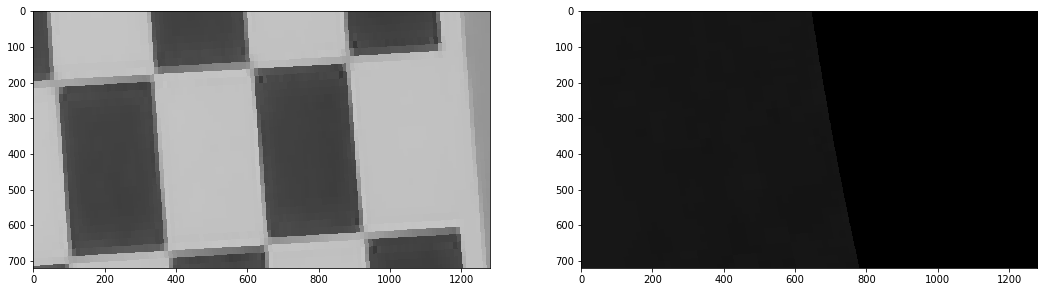

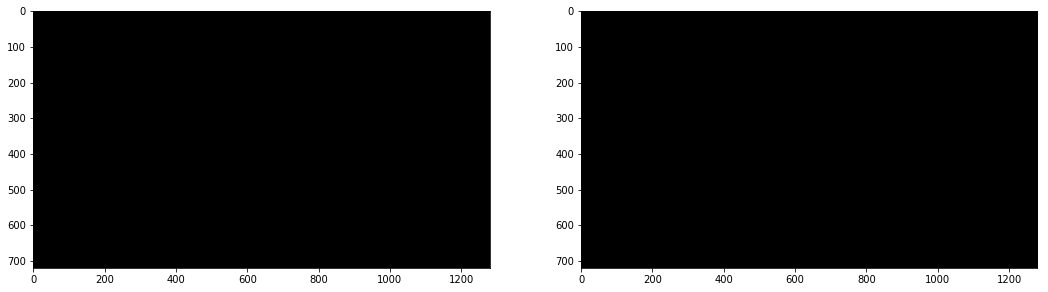

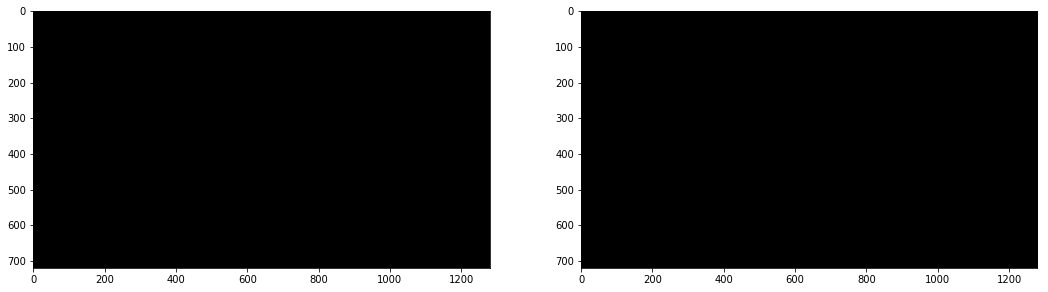

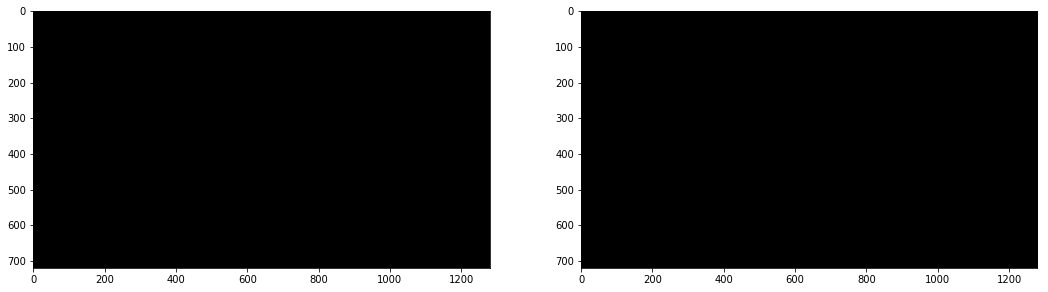

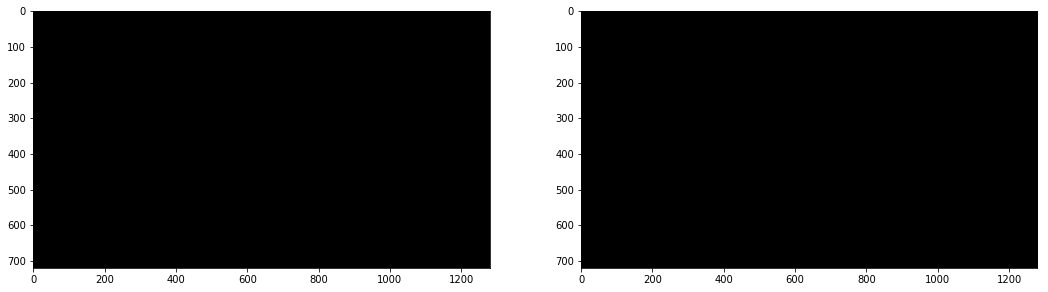

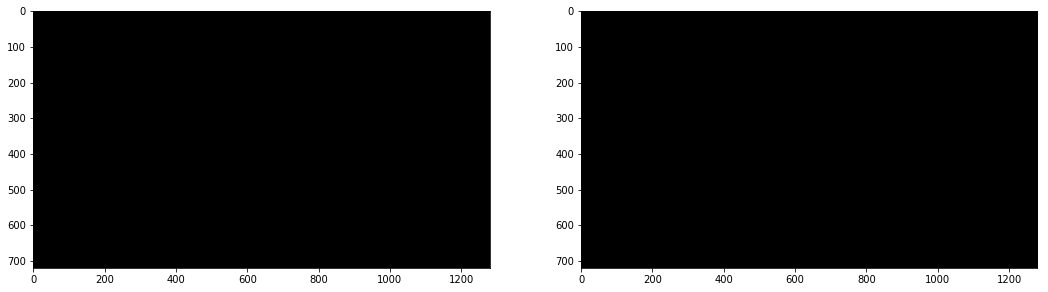

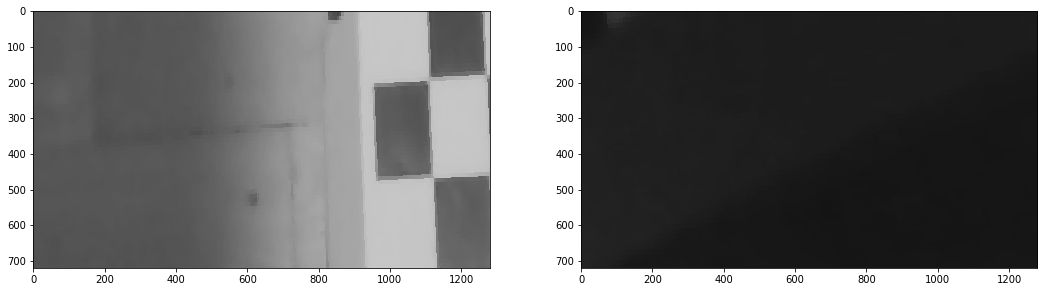

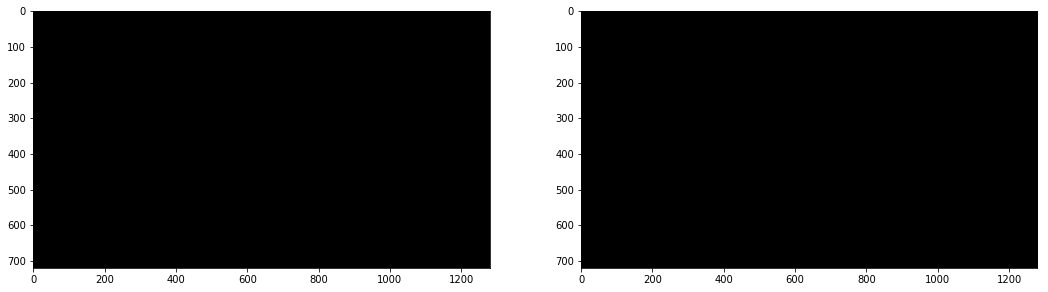

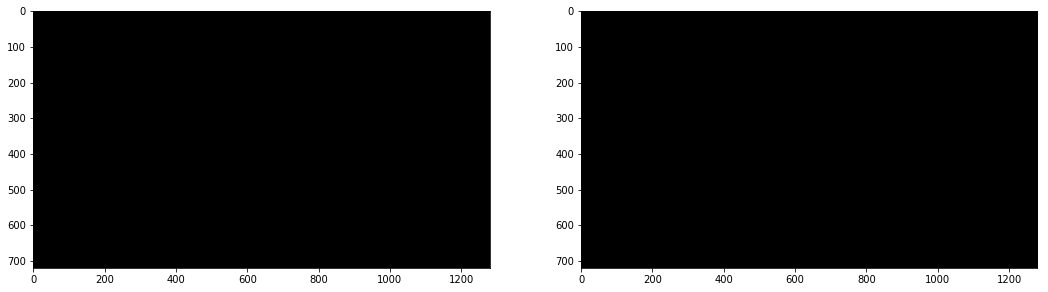

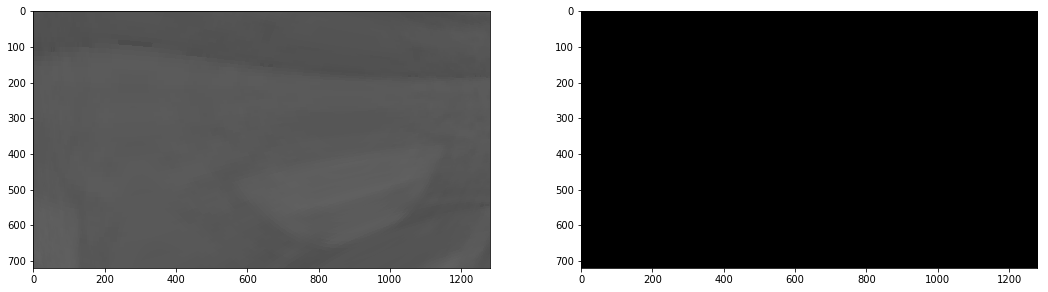

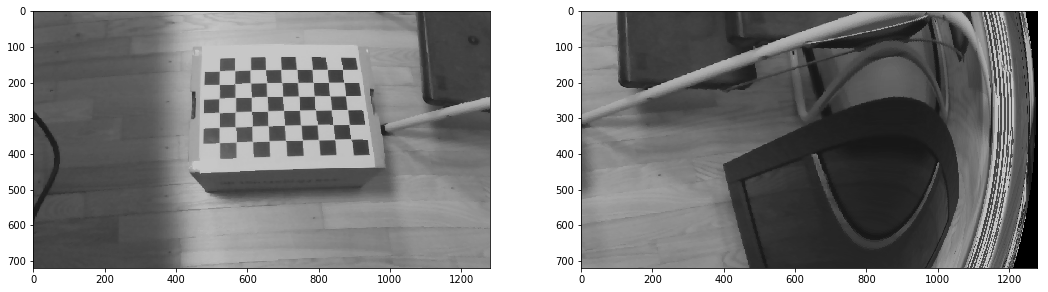

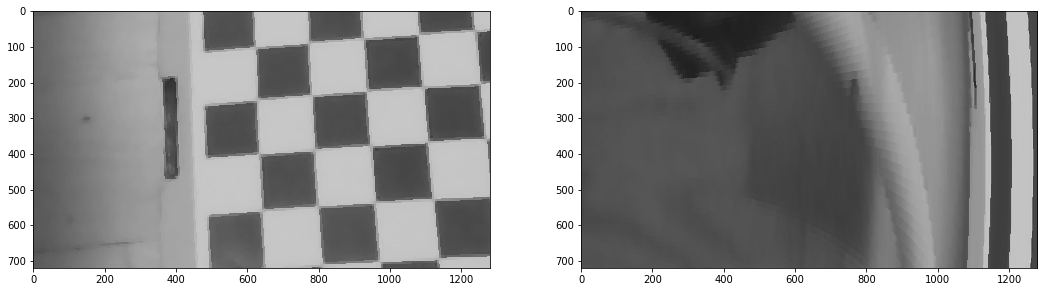

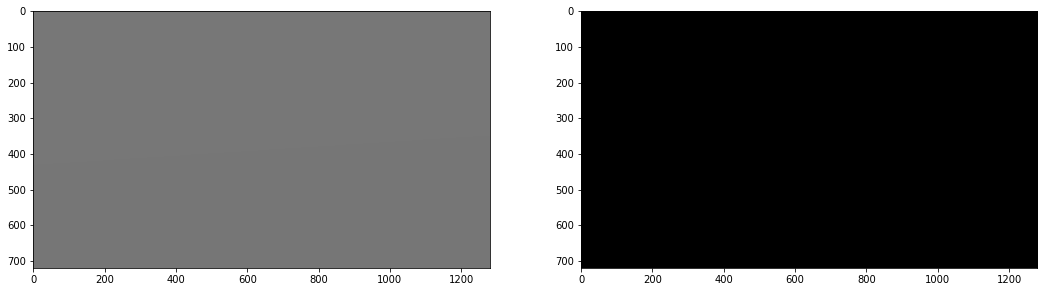

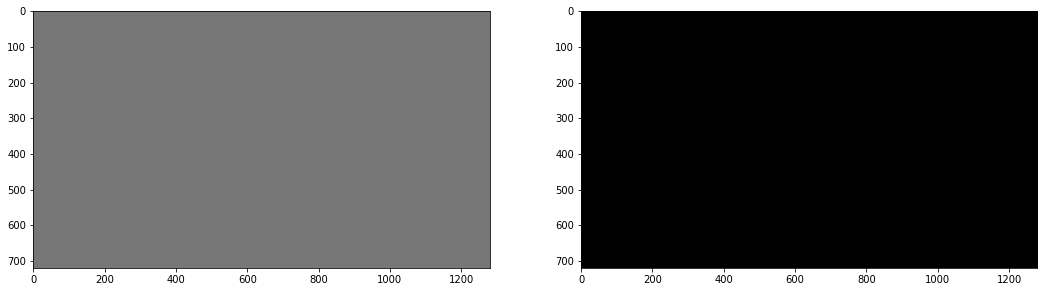

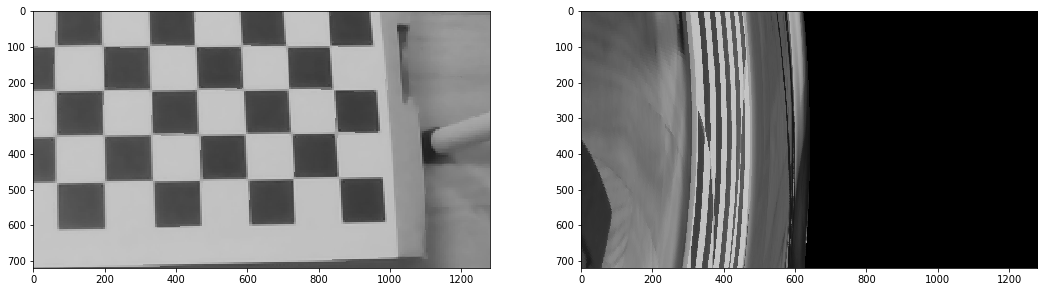

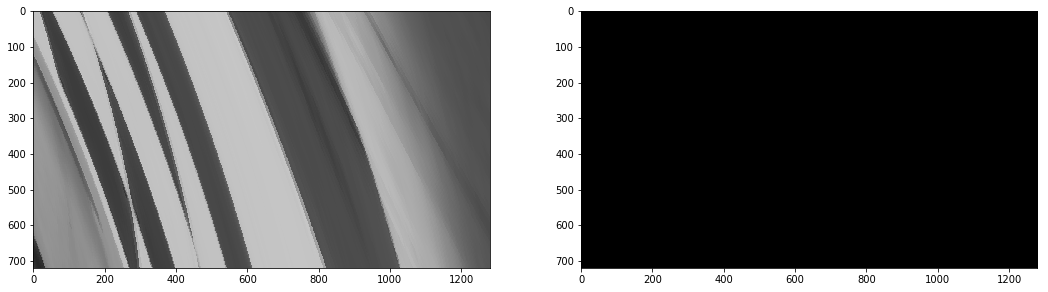

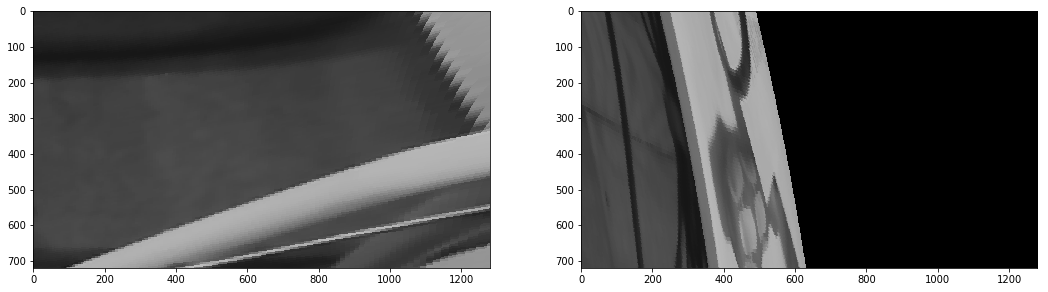

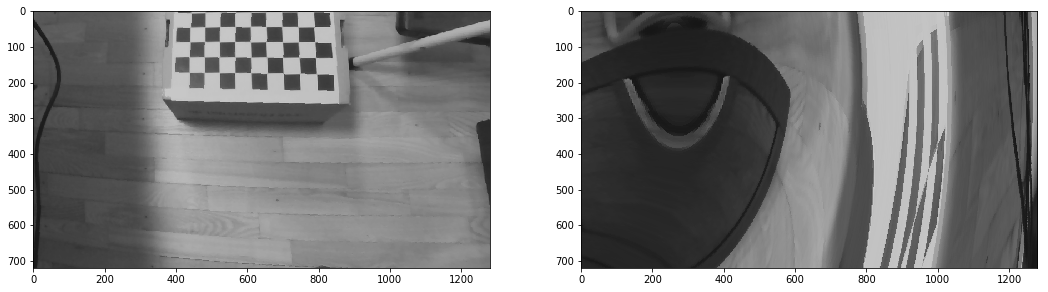

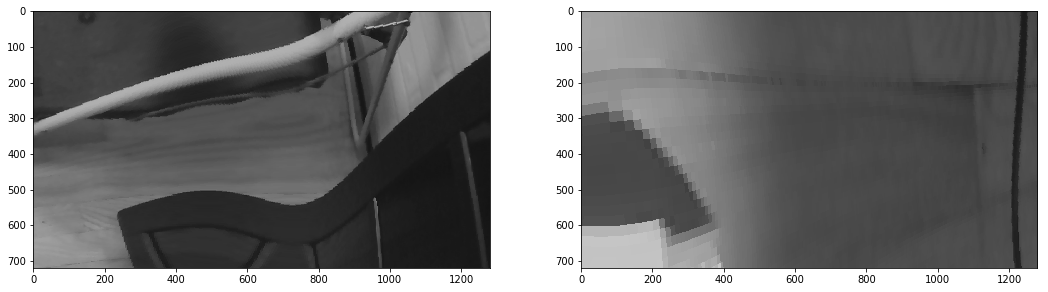

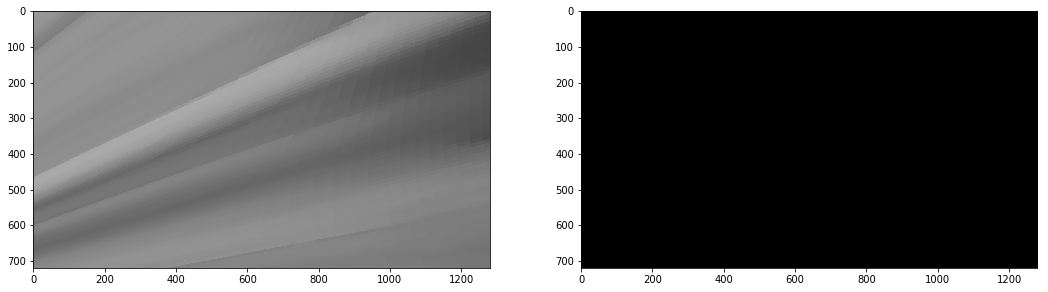

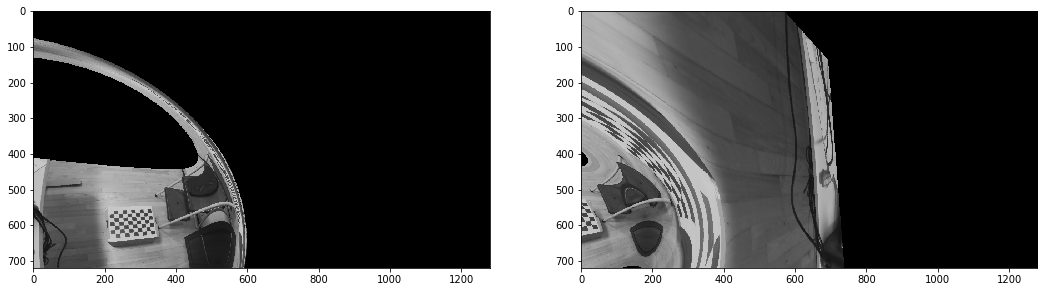

In [35]:
# ------------------------------------------------------------
# STEREO RECTIFICATION
#print(cv2.CALIB_USE_INTRINSIC_GUESS)
#print(cv2.CALIB_FIX_ASPECT_RATIO)
#print(cv2.CALIB_FIX_PRINCIPAL_POINT)
#print(cv2.CALIB_ZERO_TANGENT_DIST)
#print(cv2.CALIB_FIX_FOCAL_LENGTH)
#print(cv2.CALIB_FIX_K1)
#print(cv2.CALIB_FIX_K2)
#print(cv2.CALIB_FIX_K3)
#print(cv2.CALIB_FIX_INTRINSIC)#
#print(cv2.CALIB_SAME_FOCAL_LENGTH)
#print(cv2.CALIB_FIX_K4)
#print(cv2.CALIB_FIX_K5)
#print(cv2.CALIB_FIX_K6)
#print(cv2.CALIB_RATIONAL_MODEL)
#print(cv2.CALIB_THIN_PRISM_MODEL)
#print(cv2.CALIB_USE_EXTRINSIC_GUESS)#
#print(flag)


#flag |= cv2.CALIB_FIX_INTRINSIC
for i in range(64):
    flag = 0
    string = ''
    if i%2: flag |= cv2.CALIB_USE_INTRINSIC_GUESS; print(cv2.CALIB_USE_INTRINSIC_GUESS, end=' '); string += 'a'
    if i//2%2: flag |= cv2.CALIB_FIX_ASPECT_RATIO; print(cv2.CALIB_FIX_ASPECT_RATIO, end=' '); string += 'b'
    if i//4%2: flag |= cv2.CALIB_ZERO_TANGENT_DIST; print(cv2.CALIB_ZERO_TANGENT_DIST, end=' '); string += 'c'
    if i//8%2: flag |= cv2.CALIB_RATIONAL_MODEL; print(cv2.CALIB_RATIONAL_MODEL, end=' '); string += 'd'
    if i//16%2: flag |= cv2.CALIB_FIX_FOCAL_LENGTH; print(cv2.CALIB_FIX_FOCAL_LENGTH, end=' '); string += 'e'
    if i//32%2: flag |= cv2.CALIB_SAME_FOCAL_LENGTH; print(cv2.CALIB_SAME_FOCAL_LENGTH, end=' '); string += 'f'
    print(string,flag)

    #print('Calibrate camera')
    #ret_left, mtx_left, dist_left, rvecs_left, tvecs_left = cv2.calibrateCamera(objpoints_left, imgpoints_left, gray.shape[::-1], None, None)
    #ret_right, mtx_right, dist_right, rvecs_right, tvecs_right = cv2.calibrateCamera(objpoints_right, imgpoints_right, gray.shape[::-1], None, None)

    # Calculate the fundamental matrix for the cameras
    # https://docs.opencv.org/master/da/de9/tutorial_py_epipolar_geometry.html

    #print('Stereo calibrate')
    retval, mtx_left_new, dist_left_new, mtx_right_new, dist_right_new, R, T, E, F = cv2.stereoCalibrate(objpoints_left, 
                                                                                        imgpoints_left, 
                                                                                        imgpoints_right, 
                                                                                        mtx_left, dist_left, 
                                                                                        mtx_right, dist_right, 
                                                                                        (img_left.shape[1],
                                                                                         img_left.shape[0]),
                                                                                       flags=flag)
    #print('Stereo rectify')
    R1, R2, P1, P2, Q, validPixROI1, validPixROI2 = cv2.stereoRectify(mtx_left_new, dist_left_new,
                                                                    mtx_right_new, dist_right_new, 
                                                                    (img_left.shape[1],img_left.shape[0]), 
                                                                    R, T, alpha = 0)
    #print('Undistort and rectify')
    map1_left, map2_left = cv2.initUndistortRectifyMap(mtx_left_new, dist_left_new, R1, P1, (img_left.shape[1],img_left.shape[0]), cv2.CV_32FC1)
    map1_right, map2_right = cv2.initUndistortRectifyMap(mtx_right_new, dist_right_new, R2, P2, (img_left.shape[1],img_left.shape[0]), cv2.CV_32FC1)

    #print('Remap')
    output_img_left = cv2.remap(img_left, map1_left, map2_left, cv2.INTER_NEAREST)
    output_img_right = cv2.remap(img_right, map1_right, map2_right, cv2.INTER_NEAREST)

    #print('Show')
    figure(figsize=(18,10))
    subplot(121),imshow(output_img_left)
    subplot(122),imshow(output_img_right)
    suptitle(string)
    #print(validPixROI1, validPixROI2)
    #print('=',end='',flush=True)

In [34]:
img1 = cv2.cvtColor(output_img_left, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(output_img_right, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

kp_img = cv2.drawKeypoints(img2, kp2, img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (10,6))
plt.imshow(kp_img)

AttributeError: module 'cv2.cv2' has no attribute 'SIFT_create'

In [7]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Keep good matches: calculate distinctive image features
# Lowe, D.G. Distinctive Image Features from Scale-Invariant Keypoints. International Journal of Computer Vision 60, 91–110 (2004). https://doi.org/10.1023/B:VISI.0000029664.99615.94
# https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf
matchesMask = [[0, 0] for i in range(len(matches))]
good = []
pts1 = []
pts2 = []

for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        # Keep this keypoint pair
        matchesMask[i] = [1, 0]
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

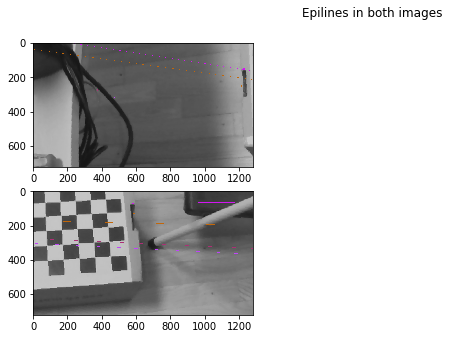

In [8]:
# Visualize epilines
# Adapted from: https://docs.opencv.org/master/da/de9/tutorial_py_epipolar_geometry.html
def drawlines(img1src, img2src, lines, pts1src, pts2src):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    try: [r, c] = img1src.shape
    except ValueError: print(img1src.shape)
    img1color = cv2.cvtColor(img1src, cv2.COLOR_GRAY2BGR)
    img2color = cv2.cvtColor(img2src, cv2.COLOR_GRAY2BGR)
    # Edit: use the same random seed so that two images are comparable!
    np.random.seed(0)
    for r, pt1, pt2 in zip(lines, pts1src, pts2src):
        try:
            color = tuple(np.random.randint(0, 255, 3).tolist())
            x0, y0 = map(int, [0, -r[2]/r[1]])
            x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1]])
            img1color = cv2.line(img1color, (x0, y0), (x1, y1), color, 1)
            img1color = cv2.circle(img1color, tuple(pt1), 5, color, -1)
            img2color = cv2.circle(img2color, tuple(pt2), 5, color, -1)
        except TypeError:
            print(r, pt1, pt2)
    return img1color, img2color


# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(
    array(pts2).reshape(-1, 1, 2), 2, F)
lines1 = lines1.reshape(-1, 3)
img5, img6 = drawlines(img1, img2, lines1, pts1, pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(
    array(pts1).reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
img3, img4 = drawlines(img2, img1, lines2, pts2, pts1)

plt.figure(figsize=(16,5))
plt.subplot(221), plt.imshow(img5)
#plt.subplot(222), plt.imshow(img6)
plt.subplot(223), plt.imshow(img3)
#plt.subplot(224), plt.imshow(img4)
plt.suptitle("Epilines in both images")
plt.show()

In [9]:
# Draw the rectified images
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
axes[0].imshow(img1_rectified, cmap="gray")
axes[1].imshow(img2_rectified, cmap="gray")
axes[0].axhline(250)
axes[1].axhline(250)
axes[0].axhline(450)
axes[1].axhline(450)
plt.suptitle("Rectified images")

NameError: name 'img1_rectified' is not defined

In [ ]:
# Draw the keypoint matches between both pictures
# Still based on: https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html
draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask[300:500],
                   flags=cv2.DrawMatchesFlags_DEFAULT)

keypoint_matches = cv2.drawMatchesKnn(
    img1, kp1, img2, kp2, matches[300:500], None, **draw_params)
plt.imshow(keypoint_matches)

In [ ]:
#flag = 0
#flag |= cv2.CALIB_USE_INTRINSIC_GUESS
#flag |= cv2.CALIB_FIX_FOCAL_LENGTH
#flag = cv2.CALIB_RATIONAL_MODEL
#flag = cv2.CALIB_FIX_ASPECT_RATIO
#flag = cv2.CALIB_SAME_FOCAL_LENGTH
#flag = cv2.CALIB_ZERO_TANGENT_DIST
#print(flag)

In [28]:

print(cv2.CALIB_USE_INTRINSIC_GUESS)
print(cv2.CALIB_FIX_ASPECT_RATIO)
print(cv2.CALIB_FIX_PRINCIPAL_POINT)
print(cv2.CALIB_ZERO_TANGENT_DIST)
print(cv2.CALIB_FIX_FOCAL_LENGTH)
print(cv2.CALIB_FIX_K1)
print(cv2.CALIB_FIX_K2)
print(cv2.CALIB_FIX_K3)
print(cv2.CALIB_FIX_INTRINSIC)#
print(cv2.CALIB_SAME_FOCAL_LENGTH)
print(cv2.CALIB_FIX_K4)
print(cv2.CALIB_FIX_K5)
print(cv2.CALIB_FIX_K6)
print(cv2.CALIB_RATIONAL_MODEL)
print(cv2.CALIB_THIN_PRISM_MODEL)
print(cv2.CALIB_USE_EXTRINSIC_GUESS)#

1
2
4
8
16
32
64
128
256
512
2048
4096
8192
16384
32768
4194304
